In [1]:
# Importing the dependencies for this analysis
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes (tables) mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Assign the classes to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

In [10]:
# Create the 'inspector' variable that will be used to inspect each table
inspector = inspect(engine)

In [11]:
# Use the inspector to print the column names within the tables
m_columns = inspector.get_columns('Measurement')

# Use a for loop to interate through the columns and print the results for each
for column in m_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
s_columns = inspector.get_columns('Station')

# Use a for loop to interate through the columns and print the results for each
for column in s_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Use the session to find the most recent date in the dataset. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [14]:
# Using this date, retrieve the previous 12 months of precipitation data by querying the 12 previous months of data.
sel = [Measurement.date,Measurement.prcp]
monthly_precip = session.query(*sel).\
    filter(Measurement.date <= dt.date(2017,8,23)).filter(Measurement.date >= dt.date(2016,8,23)).all()
print(monthly_precip)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [15]:
# Load the query results into a Pandas DataFrame
df = pd.DataFrame(monthly_precip, columns=['Date', 'Precipitation'])
df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [16]:
# Set the index to the date column.
df2 = df
df2.set_index('Date', inplace=True)
df2.sort_index()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


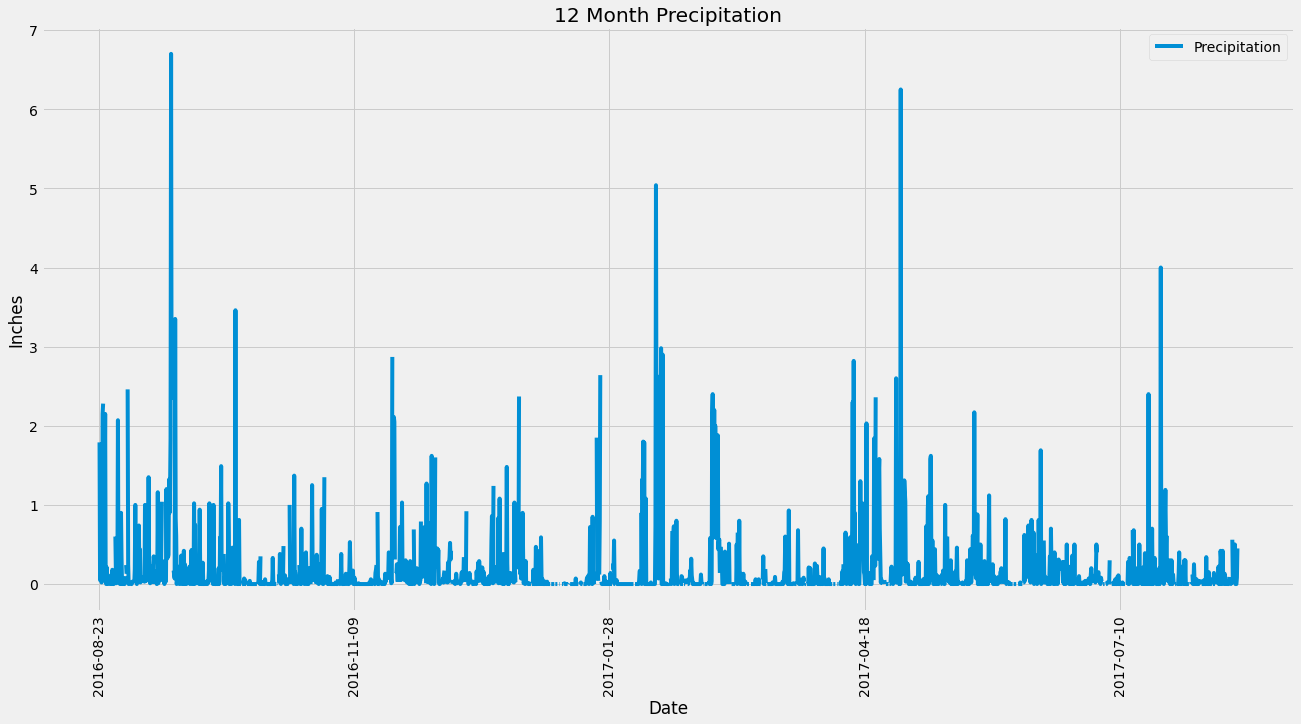

In [32]:
# Create the plot for the dataframe
df2.sort_index().plot(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title("12 Month Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()
#plt.tight_layout()

In [18]:
# Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to calculate the total number of stations in the dataset.
num_stations = session.query(Station).group_by(Station.id).distinct().count()
print(num_stations)

9


In [20]:
for row in session.query(Station, Station.id).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x00000232D87A0B80>, 1)
(<sqlalchemy.ext.automap.station object at 0x00000232D87C8910>, 2)
(<sqlalchemy.ext.automap.station object at 0x00000232D7BEB130>, 3)
(<sqlalchemy.ext.automap.station object at 0x00000232D7BEB0D0>, 4)
(<sqlalchemy.ext.automap.station object at 0x00000232D7BEB190>, 5)
(<sqlalchemy.ext.automap.station object at 0x00000232D7BEB1F0>, 6)
(<sqlalchemy.ext.automap.station object at 0x00000232D7BEB250>, 7)
(<sqlalchemy.ext.automap.station object at 0x00000232D7BEB2B0>, 8)
(<sqlalchemy.ext.automap.station object at 0x00000232D7BEB310>, 9)


In [21]:
# Design a query to find the most active stations (the stations with the most rows).
all_stations = session.query(Station.id, Station.station).all()
print(all_stations)

[(1, 'USC00519397'), (2, 'USC00513117'), (3, 'USC00514830'), (4, 'USC00517948'), (5, 'USC00518838'), (6, 'USC00519523'), (7, 'USC00519281'), (8, 'USC00511918'), (9, 'USC00516128')]


In [22]:
# List the stations and observation counts in descending order.

station_observations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
         
print(station_observations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [24]:
highest_observation_station = session.query(Station.id).filter(Station.station == 'USC00519281').scalar()
print(highest_observation_station)

7


In [25]:
# Using the most active station id, calculate the lowest, highest, and average temperatures.

lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.id == 7).scalar()

print(lowest_temp)

54.0


In [26]:
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.id == 7).scalar()

print(highest_temp)

85.0


In [27]:
average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.id == 7).scalar()

print(average_temp)

71.66378066378067


In [28]:
# Design a query to retrieve the previous 12 months of temperature observation data (TOBS)
sel = [Measurement.tobs]
twelve_month_temps = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= dt.date(2017,8,23)).\
    filter(Measurement.date >= dt.date(2016,8,23)).all()
print(twelve_month_temps)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [29]:
# Load the query results into a Pandas DataFrame
temps = pd.DataFrame(twelve_month_temps, columns=['tobs'])
temps

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


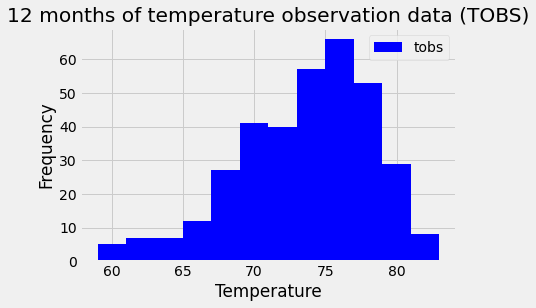

In [40]:
# Plot the results as a histogram with `bins=12`

plt.hist(temps, 12, facecolor='b', alpha=1)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'],loc='best')
plt.title('12 months of temperature observation data (TOBS)')
  
plt.show()

In [41]:
# Close our session
session.close()

# Design Your Climate App